In [1]:
import tensorflow as tf

# 模型构建

In [3]:
net = tf.keras.models.Sequential([
    # 卷积层：96 11*11 4 relu
    tf.keras.layers.Conv2D(filters=96, kernel_size=11,
                           strides=4, activation="relu"),
    # 池化：3*3 2
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    # 卷积：256 5*5 1 RELU same
    tf.keras.layers.Conv2D(filters=256, kernel_size=5,
                           padding="same", activation="relu"),
    # 池化： 3*3 2
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    # 卷积：384 3*3 1 RELU same
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding="same", activation="relu"),
    # 卷积：384 3*3 1 RELU same
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding="same", activation="relu"),
    # 卷积：256 3*3 1 RELU same
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"),
    # 池化：3*3 2
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    # 展开
    tf.keras.layers.Flatten(),
    # 全连接层：4096 relu
    tf.keras.layers.Dense(4096, activation="relu"),
    # 随机失活
    tf.keras.layers.Dropout(0.5),
    # 全连接层：4096 relu
    tf.keras.layers.Dense(4096, activation="relu"),
    # 随机失活
    tf.keras.layers.Dropout(0.5),
    # 输出层：
    tf.keras.layers.Dense(10, activation="softmax")

])

In [4]:
X = tf.random.uniform((1,227,227,1))
y = net(X)
net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (1, 55, 55, 96)           11712     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (1, 27, 27, 96)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (1, 27, 27, 256)          614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (1, 13, 13, 256)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (1, 13, 13, 384)          885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (1, 13, 13, 384)          1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (1, 13, 13, 256)          8

# 数据读取

In [5]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [6]:
(train_images,train_label),(test_images,test_labels)=mnist.load_data()

In [7]:
# 维度调整
train_images = np.reshape(train_images,(train_images.shape[0],train_images.shape[1],train_images.shape[2],1))
test_images = np.reshape(test_images,(test_images.shape[0],test_images.shape[1],test_images.shape[2],1))

In [8]:
# 对训练数据进行抽样
def get_train(size):
    # 随机生成index
    index = np.random.randint(0,train_images.shape[0],size)
    # 选择图像并进行resize
    resized_image = tf.image.resize_with_pad(train_images[index],227,227)
    return resized_image.numpy(),train_label[index]

In [12]:
# 对测试数据进行抽样
def get_test(size):
    # 随机生成index
    index = np.random.randint(0,test_images.shape[0],size)
    # 选择图像并进行resize
    resized_image = tf.image.resize_with_pad(test_images[index],227,227)
    return resized_image.numpy(),test_labels[index]

In [13]:
# 抽样结果
train_images,train_label = get_train(256)
test_images,test_labels = get_test(128)

In [14]:
import matplotlib.pyplot as plt

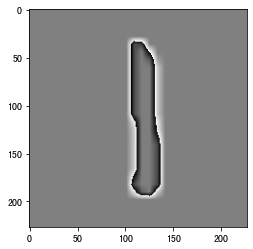

In [16]:
plt.imshow(train_images[4].astype(np.int8).squeeze(),cmap='gray')

# 模型编译

In [17]:
# 优化器,损失函数,评价指标
net.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),loss=tf.keras.losses.sparse_categorical_crossentropy
           ,metrics=['accuracy'])

# 模型训练

In [20]:
net.fit(train_images,train_label,batch_size=128,epochs=3,validation_split=0.1,verbose=1)

Epoch 1/3
2/2 [==============================] - 3s 2s/step - loss: 197.2379 - accuracy: 0.1000 - val_loss: 15641.0518 - val_accuracy: 0.1538
Epoch 2/3
2/2 [==============================] - 3s 2s/step - loss: 630482274353152.0000 - accuracy: 0.1478 - val_loss: nan - val_accuracy: 0.0385
Epoch 3/3
2/2 [==============================] - 3s 2s/step - loss: nan - accuracy: 0.1435 - val_loss: nan - val_accuracy: 0.0385


# 模型评估

In [21]:
net.evaluate(test_images,test_labels,verbose=1)

4/4 [==============================] - 1s 168ms/step - loss: nan - accuracy: 0.0938


[nan, 0.09375]